In [34]:
import nltk

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# nltk.download()

In [15]:
my_text = "Where is St. Paul located? I don't seem to find it. It isn't in my map."

word_tokenize(my_text)

['Where',
 'is',
 'St.',
 'Paul',
 'located',
 '?',
 'I',
 'do',
 "n't",
 'seem',
 'to',
 'find',
 'it',
 '.',
 'It',
 'is',
 "n't",
 'in',
 'my',
 'map',
 '.']

In [19]:
ps = PorterStemmer()

my_text2 = "Whoever eats many cookies is regretting doing so"

stemmed_sentence = []

for word in word_tokenize(my_text2):
    stemmed_sentence.append(ps.stem(word))

stemmed_sentence

['whoever', 'eat', 'mani', 'cooki', 'is', 'regret', 'do', 'so']

In [21]:
nltk.pos_tag(word_tokenize(my_text2))

[('Whoever', 'NNP'),
 ('eats', 'VBZ'),
 ('many', 'JJ'),
 ('cookies', 'NNS'),
 ('is', 'VBZ'),
 ('regretting', 'VBG'),
 ('doing', 'VBG'),
 ('so', 'RB')]

In [5]:
def is_noun(tag):
    return tag in ['NN', 'NNS', 'NNP', 'NNPS']

def is_verb(tag):
    return tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

def is_adverb(tag):
    return tag in ['RB', 'RBR', 'RBS']

def is_adjective(tag):
    return tag in ['JJ', 'JJR', 'JJS']

def penn2wn(tag):
    if is_adjective(tag):
        return wn.ADJ
    elif is_noun(tag):
        return wn.NOUN
    elif is_adverb(tag):
        return wn.ADV
    elif is_verb(tag):
        return wn.VERB
    return wn.NOUN

lzr = WordNetLemmatizer()
my_text3 = "Whoever eats many cookies is regretting doing so"
lemed = []
for (word, pos) in nltk.pos_tag(word_tokenize(my_text3)):
    lemed.append(lzr.lemmatize(word, penn2wn(pos)))

lemed

['Whoever', 'eat', 'many', 'cooky', 'be', 'regret', 'do', 'so']

In [10]:
my_text4 = "the big red cow jumped over the bright moon"
tagged = nltk.pos_tag(word_tokenize(my_text4))
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(tagged)
print(result)
# result.draw()

my_text5 = "Dogs or cats Sara, John, Tom, the girl and the bat"
tagged = nltk.pos_tag(word_tokenize(my_text5))
grammar = "NounList: {(<DT>?<NN.?><,>?)+<CC><DT>?<NN.?>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(tagged) 
print(result)
# result.draw()

grammar = """NP: {<DT>?<JJ>*<NN.?>}
            NounList: {(<NP><,>?)+<CC><NP>}"""
cp = nltk.RegexpParser(grammar)
result = cp.parse(tagged) 
print(result)
# result.draw()

(S
  (NP the/DT big/JJ red/JJ cow/NN)
  jumped/VBD
  over/IN
  (NP the/DT bright/JJ moon/NN))
(S
  (NounList Dogs/NNS or/CC cats/NNS)
  (NounList
    Sara/NNP
    ,/,
    John/NNP
    ,/,
    Tom/NNP
    ,/,
    the/DT
    girl/NN
    and/CC
    the/DT
    bat/NN))
(S
  (NounList (NP Dogs/NNS) or/CC (NP cats/NNS))
  (NounList
    (NP Sara/NNP)
    ,/,
    (NP John/NNP)
    ,/,
    (NP Tom/NNP)
    ,/,
    (NP the/DT girl/NN)
    and/CC
    (NP the/DT bat/NN)))


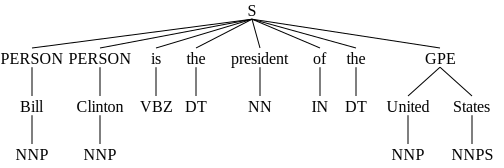

In [12]:
my_text6 = "Bill Clinton is the president of the United States"
tagged = nltk.pos_tag(word_tokenize(my_text6))
result = nltk.ne_chunk(tagged)
result

In [16]:
my_text7 = "It is a simple text this, this is a simple text, is it simple?"
result = list(nltk.ngrams(word_tokenize(my_text7), 3))
result

[('It', 'is', 'a'),
 ('is', 'a', 'simple'),
 ('a', 'simple', 'text'),
 ('simple', 'text', 'this'),
 ('text', 'this', ','),
 ('this', ',', 'this'),
 (',', 'this', 'is'),
 ('this', 'is', 'a'),
 ('is', 'a', 'simple'),
 ('a', 'simple', 'text'),
 ('simple', 'text', ','),
 ('text', ',', 'is'),
 (',', 'is', 'it'),
 ('is', 'it', 'simple'),
 ('it', 'simple', '?')]

In [30]:
import urllib
from random import choice

paragraph_len = 100
all_text = urllib.request.urlopen("https://s3.amazonaws.com/text-datasets/nietzsche.txt").read().decode("utf-8")
tokens = word_tokenize(all_text)
my_grams = list(nltk.ngrams(tokens, 3))
sentence = ["It", "is"]

for i in range(paragraph_len):
    options = []
    for trig in my_grams:
        if trig[0].lower() == sentence[-2].lower() and trig[1].lower() == sentence[-1].lower():
            options.append(trig[2])
    if len(options) > 0:
        sentence.append(choice(options))

print(" ".join(sentence)) # better detokenize instead of join by " ". as ',' will have space before and after

It is impossible . `` How many a nature spurts up suddenly like dirty water , when any one should not be preferable ? For there are `` gay science , who sees nothing in philosophy , whatever I have not succeeded in explaining our entire instinctive life in view . Perhaps severity and harshness , constraint , the world without in the internal economy of life for example society , every hand pressure , every step he takes into the form of questions from the gloomy , agreeable nooks in which religious life flourished most vigorously , believe that anybody ever


In [39]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP | V NP PP
PP -> P NP
V -> "saw" | "ate" | "walked"
NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
Det -> "a" | "an" | "the" | "my"
N -> "man" | "dog" | "cat" | "telescope" | "park"
P -> "in" | "on" | "by" | "with" """)

sentence = "Mary saw Bob".split()
rd_parser = nltk.RecursiveDescentParser(grammar)
# print(list(rd_parser.parse(sentence))[0])
parser = list(rd_parser.parse("Mary saw a dog with my telescope".split()))
for parse in parser:
    print(parse)

(S
  (NP Mary)
  (VP
    (V saw)
    (NP (Det a) (N dog) (PP (P with) (NP (Det my) (N telescope))))))
(S
  (NP Mary)
  (VP
    (V saw)
    (NP (Det a) (N dog))
    (PP (P with) (NP (Det my) (N telescope)))))


In [33]:
'''grammar = nltk.PCFG.fromstring("""
S -> NP VP [1.0]
VP -> TV NP [0.4]
VP -> IV [0.3]
VP -> DatV NP NP [0.3]
TV -> 'saw' [1.0]
IV -> 'ate' [1.0]
DatV -> 'gave' [1.0]
NP -> 'telescopes' [0.8]
NP -> 'Jack' [0.2] """)

viterbi_parser = nltk.ViterbiParser(grammar)

for tree in viterbi_parser.parse(['Jack', 'saw', 'telescopes']):
    print(tree)
print('--------')'''
grammar = nltk.PCFG.fromstring("""
S -> NP VP			[1.0]
VP -> VBP NP		[0.5]
VP -> VBP NP PP		[0.5]
TV -> 'saw'			[1.0]
VBP -> 'ate'		[1.0]
NP -> NP PP			[0.3]
PP -> IN NP			[1.0]
NP -> 'spaghetti'	[0.2]
NP -> 'they' 		[0.3]
NP -> 'meatballs'	[0.2]
IN -> 'with'		[1.0]
""")

viterbi_parser = nltk.ViterbiParser(grammar)

for tree in viterbi_parser.parse_all(['they', 'ate', 'spaghetti', 'with', 'meatballs']):
    print(tree)

(S
  (NP they)
  (VP
    (VBP ate)
    (NP spaghetti)
    (PP (IN with) (NP meatballs)))) (p=0.006)


In [39]:
sna = SentimentIntensityAnalyzer()
print(sna.polarity_scores("The movie was great!"))
print(sna.polarity_scores("I liked the book, especially the ending."))
print(sna.polarity_scores("The staff were nice, but the food was terrible."))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215}
{'neg': 0.318, 'neu': 0.536, 'pos': 0.146, 'compound': -0.5023}
